# Ultimate Data Science Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logins_df = pd.read_json('/Users/christopher/Desktop/ultimate_challenge/logins.json')

# Part 1: Exploratory Data Analysis 

In [3]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
## add 1 for each row, help with aggregation
logins_df['counts'] = 1

In [5]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
counts        93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [6]:
logins_df['login_time'].isnull().sum()

0

In [7]:
logins_df.set_index('login_time', inplace=True)

### Login Counts by 15 min intervals

In [8]:
counts_df = logins_df.groupby(pd.Grouper(freq="15Min")).sum()

In [9]:
counts_df.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
counts_df.reset_index()

,login_time,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


Text(0, 0.5, 'Counts')

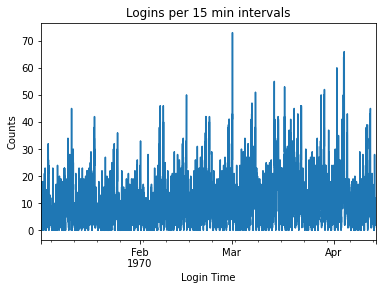

In [11]:
counts_df['counts'].plot()
plt.title('Logins per 15 min intervals')
plt.xlabel('Login Time')
plt.ylabel('Counts')

In the chart above we have the login counts resampled by 15min intervals. The chart doesnt provide much information, lets try other intervals!

### Logins Count per 24 Hours

In [12]:
counts_df_24hr = logins_df.groupby(pd.Grouper(freq='24H')).sum()
counts_df_24hr.head()

,counts
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


Text(0, 0.5, 'Counts')

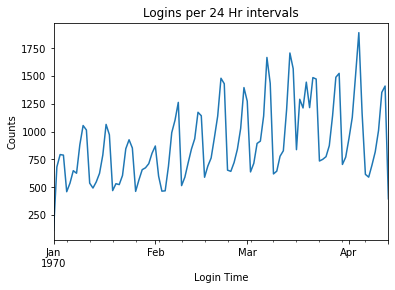

In [13]:
counts_df_24hr.reset_index()

counts_df_24hr['counts'].plot()
plt.title('Logins per 24 Hr intervals')
plt.xlabel('Login Time')
plt.ylabel('Counts')

### Login counts per week

Text(0, 0.5, 'Counts')

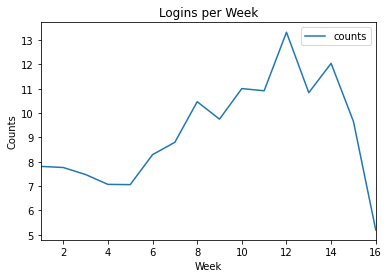

In [14]:
counts_df_w = logins_df.groupby(pd.Grouper(freq="15min")).sum()
lgw = counts_df_w.groupby(counts_df_w.index.week).mean()
lgw.plot()
plt.title('Logins per Week')
plt.xlabel('Week')
plt.ylabel('Counts')

In the chart above we resampled logins by week. We can see an increase in demand from weeks 4-12, followed by a sudden drop off at week 16.

### Logins per Day of Week

([<matplotlib.axis.XTick at 0x7f9b3cc97890>,
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')])

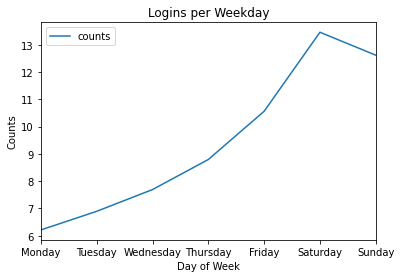

In [15]:
counts_df_wd = logins_df.groupby(pd.Grouper(freq="15min")).sum()
lgwd = counts_df_wd.groupby(counts_df_wd.index.weekday).mean()
lgwd.plot()
plt.title('Logins per Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Counts')
plt.xticks(ticks=range(len(lgwd)), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In the chart above we resampled the logins by weekdays. We can see a steady increase in logins throughout the week, peaking during the weekend. 

### Login Counts per Month 

In [16]:
counts_df_m = logins_df.groupby(pd.Grouper(freq='M')).sum()
counts_df_m

,counts
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


Text(0, 0.5, 'Counts')

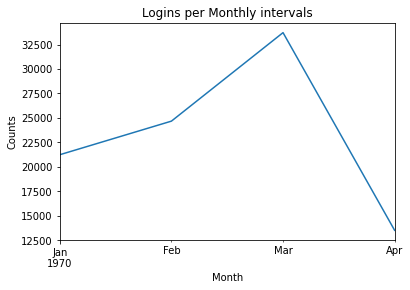

In [17]:
counts_df_m.reset_index()
counts_df_m['counts'].plot()
plt.title('Logins per Monthly intervals')
plt.xlabel('Month')
plt.ylabel('Counts')


The above chart depicts the amount of 'logins' per month. Above, we can see a steady increase in the amount of log ins from January to March. Followed by a sharp decrease leading into the month of April. The increase from Jan to Mar could be seasonal and due to colder temperatures. As the weather begins to increase people are more likely to walk or take public transportation.  

# Part 2: Experiment and Metrics Design 

1. The goal of this experiment is to increase driver availability across both cities. As a key measure of success for encouraging drivers to be available in both cities I will measure the amount of tolls crossed. 
2. This experiment will be implemented in the following ways, first the drivers will be split into two groups. The drivers in group A will be known as the control group, while drivers in group B are in the experimental. Group A will not recieve any form of reimburstments for crossing any toll booths, while Group B will be reimbursed. This experimental test will last two weeks, and will be conducted during a rolling 4 week period without any holidays. In order to verify the significance of the observations I will run an independant samples t-test, measuring the average amount of tolls crossed for each group. If there is an significant difference in the number of tolls crossed with group B, I will recommend that the city operations team reimburse their drivers for city wide availability.

# Part 3: Predictive Modeling

In [18]:
import json
with open("/Users/christopher/Desktop/ultimate_challenge/ultimate_data_challenge.json") as file:
    full_df = pd.DataFrame(json.load(file))
    
full_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [19]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Data Wrangling
In the following section I will be cleaning up data, filling in missing values, and performing some feature engineering.

In [20]:
## checking for missing data
full_df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [21]:
#filling in missing values, both distributions below are left skewed will use median

arod_med = full_df['avg_rating_of_driver'].median()
full_df['avg_rating_of_driver'].fillna(arod_med, inplace=True)

arbd_med = full_df['avg_rating_by_driver'].median()
full_df['avg_rating_by_driver'].fillna(arbd_med, inplace=True)

full_df['phone'].fillna('Unknown', inplace=True)

In [22]:
arod_med, arbd_med

(4.9, 5.0)

In [23]:
## convert dates to datetime columns
full_df['last_trip_date'] = pd.to_datetime(full_df['last_trip_date'])
full_df['signup_date'] = pd.to_datetime(full_df['signup_date'])

In [24]:
## feature engineer new column based on 'last_trip_date', potential target column?

full_df['retained'] = np.where(full_df['last_trip_date'] > '2014-6-1', 'retained', 'not_retained')
full_df['retained'].head()


0        retained
1    not_retained
2    not_retained
3        retained
4    not_retained
Name: retained, dtype: object

In [25]:
## finding percentage of customers retained

print(full_df['retained'].value_counts())

pct_retained = (18310/31690) * 100
print("Percentage of customers retained: {:.0f}%".format(pct_retained))

not_retained    31690
retained        18310
Name: retained, dtype: int64
Percentage of customers retained: 58%


## Exploratory Data Analysis

In the following sections I will be taking a closer look at the distributions of some of my features. 

Text(0.5, 1.0, '# of users per city')

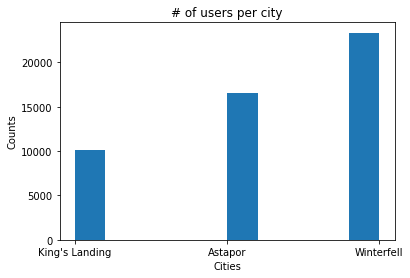

In [26]:
plt.hist(full_df['city'])
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.title('# of users per city')

In the chart above we can see that the city of Winterfell has the most users. On the other hand the city of King's Landing has the least users.

Text(0.5, 1.0, 'Customer Phone Types')

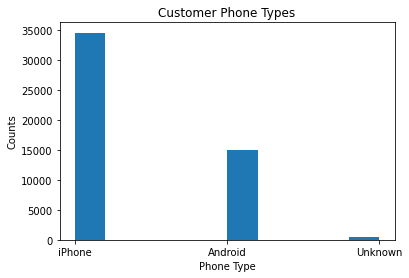

In [27]:
plt.hist(full_df['phone'])
plt.xlabel('Phone Type')
plt.ylabel('Counts')
plt.title('Customer Phone Types')

In the chart above we can see that most customers have a iPhone.

Text(0.5, 1.0, 'Average rating of driver')

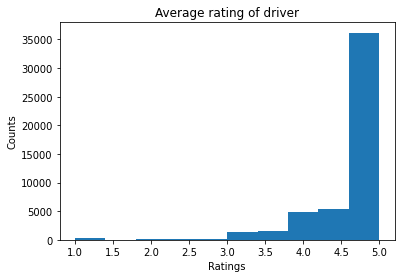

In [28]:
plt.hist(full_df['avg_rating_of_driver'])
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Average rating of driver')

In the chart above we can see the distribution of 'average rating of driver'. The distribution 
is heavily skewed to the left.

Text(0.5, 1.0, 'Average rating by driver')

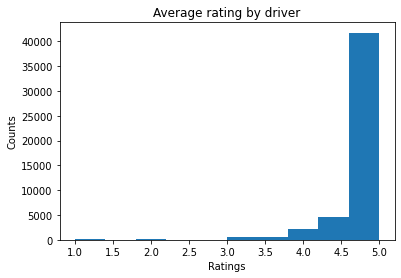

In [29]:
plt.hist(full_df['avg_rating_by_driver'])
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Average rating by driver')

In the chart above we can see the distribution of 'average rating by driver'. The distribution 
is also heavily skewed to the left.

Text(0, 0.5, 'Counts')

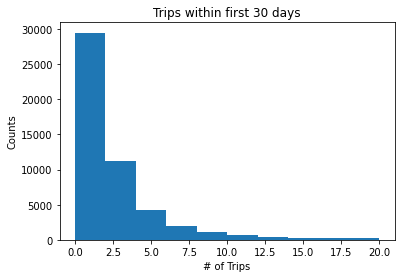

In [30]:
plt.hist(full_df['trips_in_first_30_days'], range=(0,20))
plt.title('Trips within first 30 days')
plt.xlabel('# of Trips')
plt.ylabel('Counts')

In the chart above we can see the distribution of 'trips within the first 30 days'. We can see 
that most customers take between 0 to 1.5 trips when they first sign up.

## Machine Learning

In the following section I will be performing data preprocessing and building a machine learning model.

### Data Preprocessing

In [31]:
## converting dates to seperate columns for machine learning 
full_df['signup_day'] = full_df['signup_date'].dt.day
full_df['signup_month'] = full_df['signup_date'].dt.month
full_df['signup_year'] = full_df['signup_date'].dt.year

full_df['last_day'] = full_df['last_trip_date'].dt.day
full_df['last_month'] = full_df['last_trip_date'].dt.month
full_df['last_year'] = full_df['last_trip_date'].dt.year

In [32]:
X = full_df.drop(columns=['retained', 'signup_date', 'last_trip_date'])

In [33]:
## encoding categorical values
X = pd.get_dummies(X, drop_first=True)
y = full_df['retained']
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_day,signup_month,signup_year,last_day,last_month,last_year,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,25,1,2014,17,6,2014,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,29,1,2014,5,5,2014,0,0,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,6,1,2014,7,1,2014,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,10,1,2014,29,6,2014,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,27,1,2014,15,3,2014,0,1,0,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.3, random_state=42)

std = StandardScaler()

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

### Machine Learning Algorithms

In [35]:
## baseline model 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

dclf = DummyClassifier(strategy='most_frequent')
dclf.fit(X_train_scaled,y_train)
y_pred = dclf.predict(X_test_scaled)
print('Training Score:',dclf.score(X_train_scaled,y_train))
print('Testing Score',dclf.score(X_test_scaled, y_test))

Training Score: 0.6333428571428571
Testing Score 0.6348666666666667


In [36]:
print(f1_score(y_test,y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.3883293234922318


/Users/christopher/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

not_retained       0.63      1.00      0.78      9523
    retained       0.00      0.00      0.00      5477

    accuracy                           0.63     15000
   macro avg       0.32      0.50      0.39     15000
weighted avg       0.40      0.63      0.49     15000

[[9523    0]
 [5477    0]]


In [37]:
#use grid seach with Support Vector Classifier for best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC()

param_grid = {'C': [ 1, 10, 20],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma' : ['scale', 'auto']}


gs = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring = 'accuracy')
gs.fit(X_train_scaled, y_train)
y_pred = gs.predict(X_test_scaled)
print("Training Accuracy: {:.3f}".format(gs.score(X_train_scaled, y_train)))
print("Test Accuracy: {:.3f}".format(gs.score(X_test_scaled, y_test)))
gs.best_params_

Training Accuracy: 0.999
Test Accuracy: 0.999


{'C': 20, 'gamma': 'scale', 'kernel': 'linear'}

In [38]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

print(f1_score(y_test,y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.9987053393875116
              precision    recall  f1-score   support

not_retained       1.00      1.00      1.00      9523
    retained       1.00      1.00      1.00      5477

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[9519    4]
 [  14 5463]]


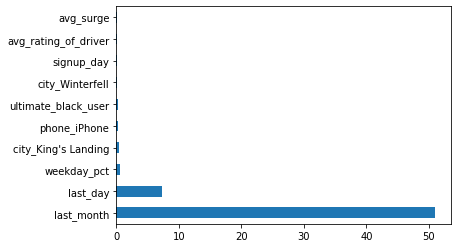

In [39]:
## Find most important features for Support Vector Classifier with previous 
## Grid Search best params.

features = X.columns
svm = SVC(kernel='linear', C=20, gamma='scale')
svm.fit(X_train_scaled, y_train)

pd.Series(abs(svm.coef_[0]), index=features).nlargest(10).plot(kind='barh')

As you can see in the above code our baseline model reached a level of 63% accuracy with an F1 score of .33. I chose to use a SVM model because it works great with big datasets and classification. Our support vector classifier achieved an accuracy of 99% with an F1 score of .99. The best parameters for our SVM classifier were selected using GridSearchCV. After viewing the confusion matrix for our SVM classifier we can see that it incorrectly misclassified a select few datapoints on both ends. 

In the chart above we can see that the most contributing features to our alogrithm were 'last_month', 'last_day', and 'weekday_pct'. 

Ultimate will be able to leverage the new insights provided by my model. With these insights they can target customers with similar charactericss as those in the 'non_retained' group and figure out ways to better serve their needs. Therefore, with the use of my model Ultimate will be able to increase their user retention rate. 